<a href="https://www.kaggle.com/code/suryasundarvadali/credit-card-fraud-aiml?scriptVersionId=161161768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler 
from xgboost import XGBClassifier

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [9]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, X_train, y_train) :
    train_sizes, train_scores, test_scores = learning_curve(estimator=est, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(8,10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
    plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
    plt.grid(b='on')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.6, 1.0])
    plt.show()

In [10]:
def plot_roc_curve(est,X_test,y_test) :
    probas = est.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')       
    plt.plot([0,0,1],[0,1,1],'g:')     
    plt.xlim([-0.05,1.2])
    plt.ylim([-0.05,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [13]:
df[(df.Class==1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.isnull().values.sum() 

0

In [17]:
y = df["Class"]
X = df.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf=LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [19]:
predictions = clf.predict(X_test)

In [20]:

accuracy_score(predictions, y_test)

0.9991222218320986

In [21]:
confusion_matrix(y_test, predictions)

array([[56856,    14],
       [   36,    56]])

In [22]:
pd.crosstab(y_test, predictions, rownames=["Reel"], colnames=["Predictions"])

Predictions,0,1
Reel,,
0,56856,14
1,36,56


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clfRFC = RandomForestClassifier()
clfRFC.fit(X_train, y_train)
y_clfRFC = clfRFC.predict(X_test)
print(classification_report(y_test, y_clfRFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.93      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
cm = confusion_matrix(y_test, y_clfRFC)
print(cm)

[[56870     5]
 [   20    67]]


In [25]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)
y_train.value_counts()

0    405
1    405
Name: Class, dtype: int64

In [27]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_RFC = RFC.predict(X_test)

print(classification_report(y_test, y_RFC))

cm = confusion_matrix(y_test, y_RFC)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.08      0.84      0.14        87

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962

[[56015   860]
 [   14    73]]


In [28]:
y = df["Class"]
X = df.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    227440
1    227440
Name: Class, dtype: int64

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_rf = rf.predict(X_test)
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.85      0.79      0.82        87

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[56863    12]
 [   18    69]]


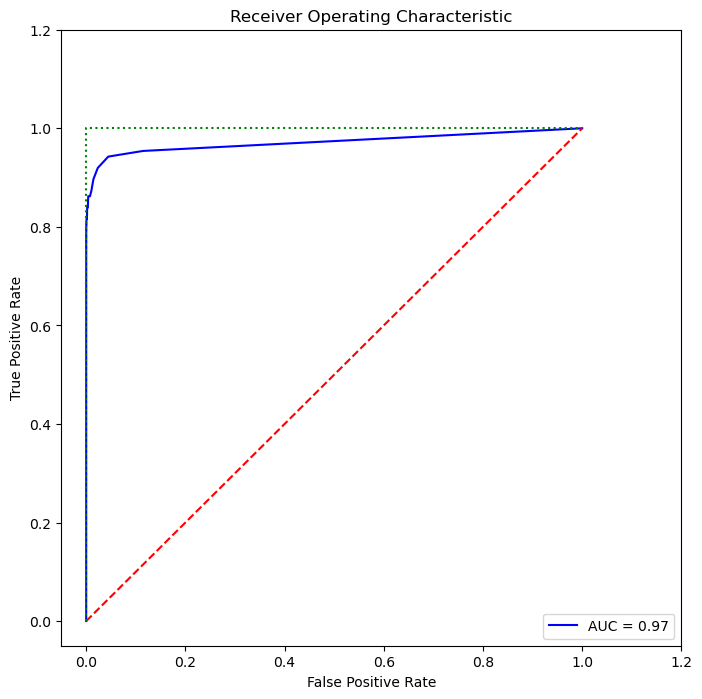

In [32]:
#plot_learning_curve(rf, X_train, y_train)
plot_roc_curve(rf,X_test,y_test)

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test))

0.9993504441557529


In [35]:
y_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_xgb))

cm = metrics.confusion_matrix(y_test, y_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.79      0.79        87

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56856    19]
 [   18    69]]


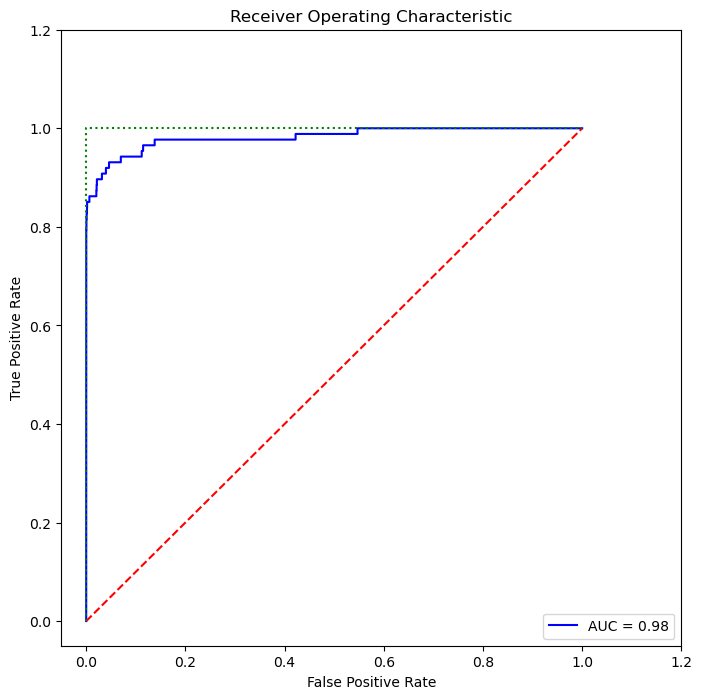

In [36]:
#plot_learning_curve(xgb, X_train, y_train)
plot_roc_curve(xgb,X_test,y_test)

In [37]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.79      0.79        87

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
y = df["Class"]
X = df.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=284315/492)
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)

In [41]:
print(xgb.score(X_test,y_test))

0.9995259997893332


In [42]:
print(classification_report(y_test, y_xgb))
cm = confusion_matrix(y_test, y_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.89      0.78      0.83        87

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56867     8]
 [   19    68]]


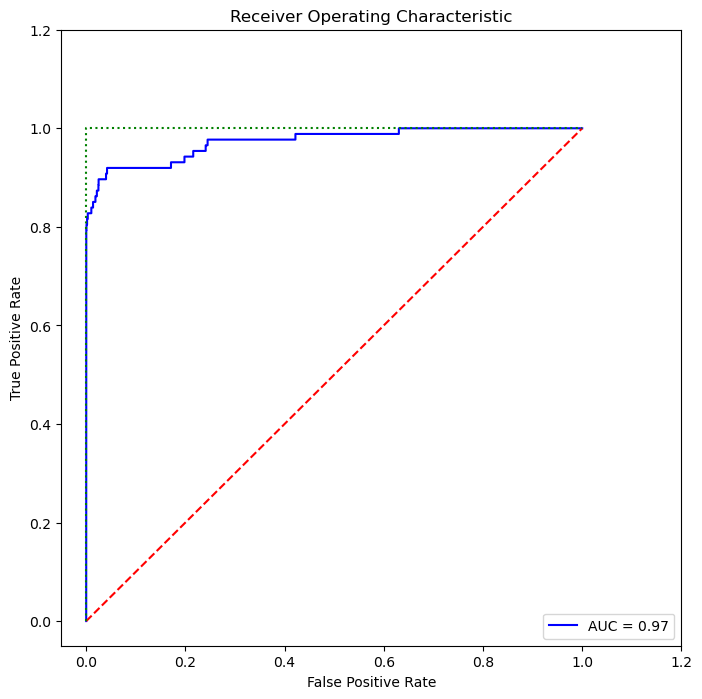

In [43]:
#plot_learning_curve(xgb, X_train, y_train)
plot_roc_curve(xgb,X_test,y_test)